In [1]:
from glob import glob
import json
import numpy as np
from multiprocess import Pool
import itertools
from tqdm import tqdm

def chunks(l, n):
    for i in range(0, len(l), n):
        yield (l[i: i + n], i // n)

def multiprocessing(strings, function, cores=6, returned=True):
    df_split = chunks(strings, len(strings) // cores)
    pool = Pool(cores)
    pooled = pool.map(function, df_split)
    pool.close()
    pool.join()

    if returned:
        return list(itertools.chain(*pooled))

In [2]:
files = glob('output-synthetic/*')
len(files)

507607

In [3]:
def loop(files):
    files, _ = files
    data = []
    for f in tqdm(files):
        with open(f) as fopen:
            d = json.load(fopen)
        data.append(d)
    return data

In [4]:
data = multiprocessing(files, loop, cores=20)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 14949.15it/s]


In [5]:
data[0]

{'audio_filename': 'multilingual-tts_audio/multilingual-tts-data-train-00000-of-00004-c699f04e5a4da714_2787.mp3',
 'text': 'Мария (Spanish) sagte "Ich liebe Phở" (Vietnamese), während sie in der Berliner (German) Sonne das Buch "El Quijote" (Spanish) las.',
 'speaker': 'multilingual-tts_audio_Grace',
 'fluency': '{"timestamp": [[0, 3], [1, 4], [2, 5], [3, 6], [4, 7], [5, 8], [6, 9]], "label": ["Fluent", "Fluent", "Fluent", "Fluent", "Fluent", "Fluent", "Fluent"], "disfluency_label": [[], [], [], [], [], [], []]}',
 'quality': ['silky', 'loud', 'crisp'],
 'accent': 'Germanic',
 'sex': 'female',
 'age': 35,
 'gender': 'female',
 'emotion': '中立/neutral',
 'pitch_mean': 173.5242156982422,
 'pitch_std': 31.243770599365234,
 'snr': 59.58917999267578,
 'c50': 58.8306770324707,
 'vad_duration': 9.922500000000003,
 'sdr': 26.706317901611328,
 'pesq': 3.879478931427002,
 'stoi': 0.9972986578941345,
 'phonemes': ['Мария',
  'sagte',
  'Ich',
  'liebe',
  'Phở',
  'während',
  'sie',
  'in',
  'de

In [14]:
from datasets import Dataset

dataset = Dataset.from_list(data)

/root/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


In [ ]:
dataset.push_to_hub('Scicom-intl/ExpressiveSpeech')

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ? shards/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Processing Files (0 / 0): |          |  0.00B /  0.00B            

New Data Upload: |          |  0.00B /  0.00B            

In [6]:
len_description = [len(data[i]['description']) for i in range(len(data))]
len_description_np = np.array(len_description)

/tmp/ipykernel_3089587/2375626832.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(len_description_np)


<Axes: ylabel='Density'>

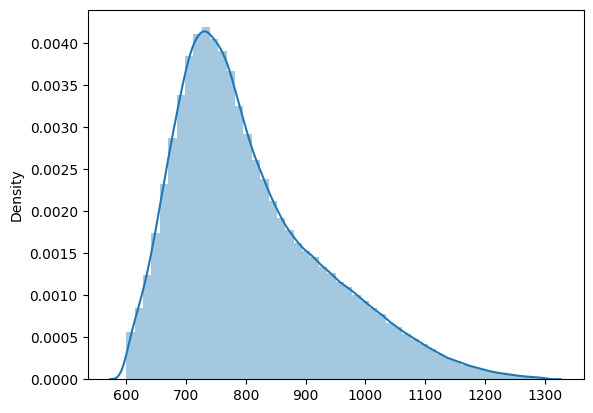

In [7]:
import seaborn as sns

sns.distplot(len_description_np)

/tmp/ipykernel_3089587/458231542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(description_category_np)


<Axes: ylabel='Density'>

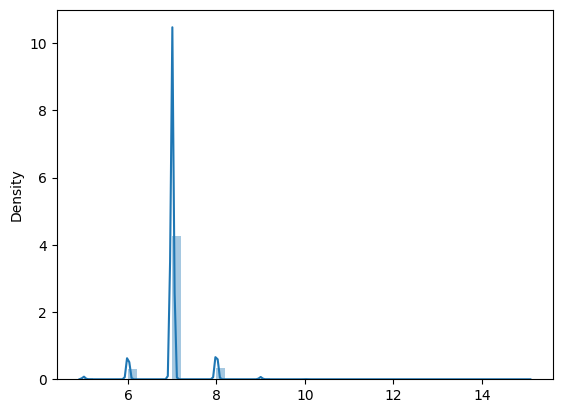

In [8]:
description_category = [data[i]['description_category'].count('\n') for i in range(len(data))]
description_category_np = np.array(description_category)
sns.distplot(description_category_np)

/tmp/ipykernel_3089587/2835589152.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(description_category_np)


<Axes: ylabel='Density'>

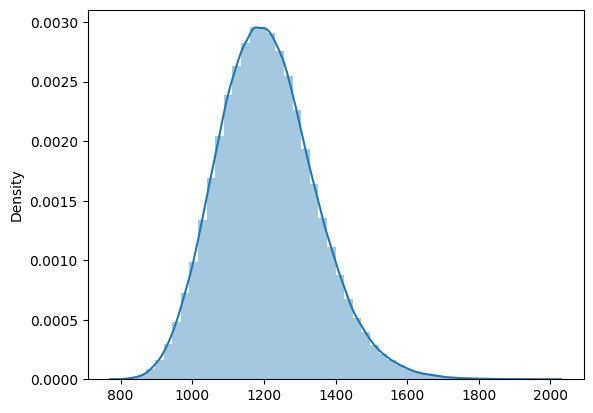

In [9]:
description_category = [len(data[i]['description_category']) for i in range(len(data))]
description_category_np = np.array(description_category)
sns.distplot(description_category_np)

In [10]:
np.where(description_category_np < 5)[0].shape

(0,)

In [11]:
from collections import defaultdict
import re

cyrillic_characters = [
    # Basic Cyrillic Alphabet
    'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я',
    'а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я',

    # Extended Cyrillic Characters
    'Ѐ', 'Ђ', 'Ѓ', 'Є', 'Ѕ', 'І', 'Ї', 'Ј', 'Љ', 'Њ', 'Ћ', 'Ќ', 'Ѝ', 'Ў', 'Џ', 'Ѡ', 'Ѣ', 'Ѥ', 'Ѧ', 'Ѩ', 'Ѫ', 'Ѭ', 'Ѯ', 'Ѱ', 'Ѳ', 'Ѵ', 'Ҁ', 'Ҋ', 'Ҍ', 'Ҏ', 'Ґ', 'Ғ', 'Ҕ', 'Җ', 'Ҙ', 'Қ', 'Ҝ', 'Ҟ', 'Ҡ', 'Ң', 'Ҥ', 'Ҧ', 'Ҩ', 'Ҫ', 'Ҭ', 'Ү', 'Ұ', 'Ҳ', 'Ҵ', 'Ҷ', 'Ҹ', 'Һ', 'Ҽ', 'Ҿ', 'Ӏ', 'Ӂ', 'Ӄ', 'Ӆ', 'Ӈ', 'Ӊ', 'Ӌ', 'Ӎ', 'Ӑ', 'Ӓ', 'Ӕ', 'Ӗ', 'Ә', 'Ӛ', 'Ӝ', 'Ӟ', 'Ӡ', 'Ӣ', 'Ӥ', 'Ӧ', 'Ө', 'Ӫ', 'Ӭ', ' Ӯ', 'Ӱ', 'Ӳ', 'Ӵ', 'Ӷ', 'Ӹ', 'Ӻ', 'Ӽ', 'Ӿ', 'ӿ', 'Ԁ', 'Ԃ', 'Ԅ', 'Ԇ', 'Ԉ', 'Ԋ', 'Ԍ', 'Ԏ', 'Ԑ', 'Ԓ', 'Ԕ', 'Ԗ', 'Ԙ', 'Ԛ', 'Ԝ', 'Ԟ', 'Ԡ', 'Ԣ', 'ԥ', 'Ԧ', 'Ԩ', 'Ԫ', 'Ԭ', 'Ԯ', '԰', 'Բ', 'Դ', 'Զ', 'Ը', 'Ժ', 'Լ', 'Ծ',
    'ѐ', 'ђ', 'ѓ', 'є', 'ѕ', 'і', 'ї', 'ј', 'љ', 'њ', 'ћ', 'ќ', 'ѝ', 'ў', 'џ', 'ѡ', 'ѣ', 'ѥ', 'ѧ', 'ѩ', 'ѫ', 'ѭ', 'ѯ', 'ѱ', 'ѳ', 'ѵ', 'ҁ', 'ҋ', 'ҍ', 'ҏ', 'ґ', 'ғ', 'ҕ', 'җ', 'ҙ', 'қ', 'ҝ', 'ҟ', 'ҡ', 'ң', 'ҥ', 'ҧ', 'ҵ', 'ҫ', 'ҭ', 'ү', 'ұ', 'ҳ', 'ҵ', 'җ', 'ҹ', 'һ', 'ҽ', 'ҿ', 'ӏ', 'ӂ', 'ӄ', 'ӆ', 'ӈ', 'ӊ', 'ӌ', 'ӎ', 'ạ', 'ӓ', 'ӕ', 'ӗ', 'ә', 'ӛ', 'ӝ', 'ӟ', 'ӡ', 'ӣ', 'ӥ', 'ӧ', 'ө', 'ӫ', 'ӭ', 'ӯ', 'ӱ', 'ӳ', 'ӵ', 'ғ', 'ӷ', 'ӹ', 'ӻ', 'ӽ', 'ӿ', 'ԁ', 'ԃ', 'ԅ', 'ԇ', 'ԉ', 'ԋ', 'ԍ', 'ԏ', 'ԑ', 'ԓ', 'ԕ', 'ԗ', 'ԙ', 'ԛ', 'ԝ', 'ԟ', 'ԡ', 'ԣ', 'ԥ', 'ԧ', 'ԩ', 'ԫ', 'ԭ', 'ԯ', 'Ա', 'Գ', 'Ե', 'Է', 'Թ', 'Ի', 'Խ', 'Կ'
]

cyrillic_characters = set(cyrillic_characters)

weird_chars = {
 '\x81',
 '\x8a',
 '\x8b',
 '\x8c',
 '\x8d',
 '\x8f',
 '\x90',
 '\x96',
 '\x9d',
 '\x9f',
 '¡',
 '¤',
 '¥',
 '§',
 '¨',
 'ª',
 '«',
 '¬',
 '\xad',
 '¯',
 '°',
 '³',
 '¶',
 '·',
 '¸',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ï',
 'Œ',
 'œ',
 'Š',
 'š',
 'Ÿ',
 'ˆ',
 '˜',
 '–',
 '�',
 '‘',
 '‚',
 '„',
 '€'}

def detect_indian(text):
    for ch in text:
        code_point = ord(ch)
        if (
            0x0900 <= code_point <= 0x097F or  # Devanagari
            0x0980 <= code_point <= 0x09FF or  # Bengali
            0x0A00 <= code_point <= 0x0A7F or  # Gurmukhi
            0x0A80 <= code_point <= 0x0AFF or  # Gujarati
            0x0B00 <= code_point <= 0x0B7F or  # Oriya
            0x0B80 <= code_point <= 0x0BFF or  # Tamil
            0x0C00 <= code_point <= 0x0C7F or  # Telugu
            0x0C80 <= code_point <= 0x0CFF or  # Kannada
            0x0D00 <= code_point <= 0x0D7F     # Malayalam
        ):
            return True
    return False

def detect_mandarin(text):
    for char in text:
        codepoint = ord(char)
        if (
            0x4E00 <= codepoint <= 0x9FFF or   # CJK Unified Ideographs
            0x3400 <= codepoint <= 0x4DBF or   # CJK Unified Ideographs Extension A
            0x20000 <= codepoint <= 0x2A6DF or # Extension B
            0x2A700 <= codepoint <= 0x2B73F or # Extension C
            0x2B740 <= codepoint <= 0x2B81F or # Extension D
            0x2B820 <= codepoint <= 0x2CEAF or # Extension E
            0x2CEB0 <= codepoint <= 0x2EBEF    # Extension F
        ):
            return True
    return False

def detect_russian(text):
    # Russian characters fall within the Unicode range \u0400-\u04FF (Cyrillic script)
    russian_pattern = re.compile(r'[\u0400-\u04FF]+')
    return bool(russian_pattern.search(text))

def detect_arabic(text):
    # Arabic characters fall within the Unicode range \u0600-\u06FF
    arabic_pattern = re.compile(r'[\u0600-\u06FF]+')
    return bool(arabic_pattern.search(text))

def detect_ngram_repetitions(text, n=10, word = True):
    if word:
        tokens = text.split()
    else:
        tokens = text
    ngrams = defaultdict(int)

    for i in range(len(tokens) - n + 1):
        ngram = ' '.join(tokens[i:i+n])
        ngrams[ngram] += 1
    repeated_ngrams = {ngram: count for ngram, count in ngrams.items() if count > 1}
    
    return repeated_ngrams
    
def accept(d, min_len = 20):
    d = d.strip()
    d_lower = d.lower()

    if len(d.split()) < min_len:
        return False
    
    if len(set(d) & cyrillic_characters):
        return False
    
    if len(set(d) & weird_chars):
        return False

    repeated = detect_ngram_repetitions(d, n = 5)
    for v in repeated.values():
        if v > 3:
            return False

    if detect_arabic(d):
        return False
    
    if detect_russian(d):
        return False
    
    if detect_indian(d):
        return False
    
    if detect_mandarin(d):
        return False

    return True
        
def loop(files):
    files, _ = files
    data = []
    for f in tqdm(files):
        with open(f) as fopen:
            d = json.load(fopen)
        if len(d['description']) > 1300 or len(d['description']) < 600:
            data.append(f)
            continue
        if len(d['description_category']) > 2000 or len(d['description_category']) < 800:
            data.append(f)
            continue
        if '**' in d['description']:
            data.append(f)
            continue
        if '**' in d['description_category']:
            data.append(f)
            continue
        c = d['description_category'].count('\n')
        if c > 15:
            data.append(f)
            continue
        if c < 5:
            data.append(f)
            continue
        if not accept(d['description']):
            data.append(f)
            continue
        if not accept(d['description_category']):
            data.append(f)
            continue
    return data

In [12]:
rejected = multiprocessing(files, loop, cores=30)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16920/16920 [00:09<00:00, 1737.72it/s]
